In [122]:
from sklearn.datasets import make_regression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


Right, that was easy ? Add some distorsion to your data to make the problem harder (like some quadratique distorsion)

In [123]:
degre = 2

# création d'un ensemble X,Y clairement associé à une parabole
x, y = make_regression(n_samples=100, n_features=1, noise=10, random_state=42)

y = y**2 + 2*y + 6

    

plt.show()

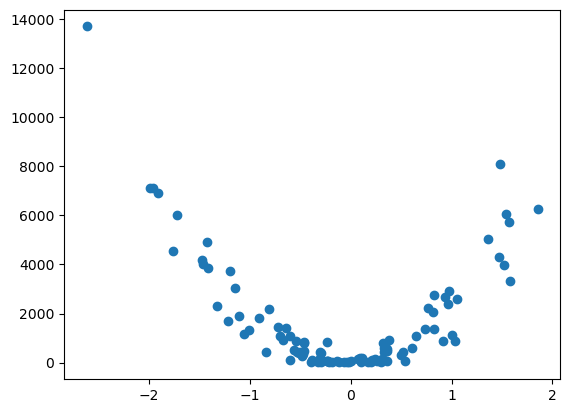

In [124]:
plt.scatter(x,y)

In [125]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)

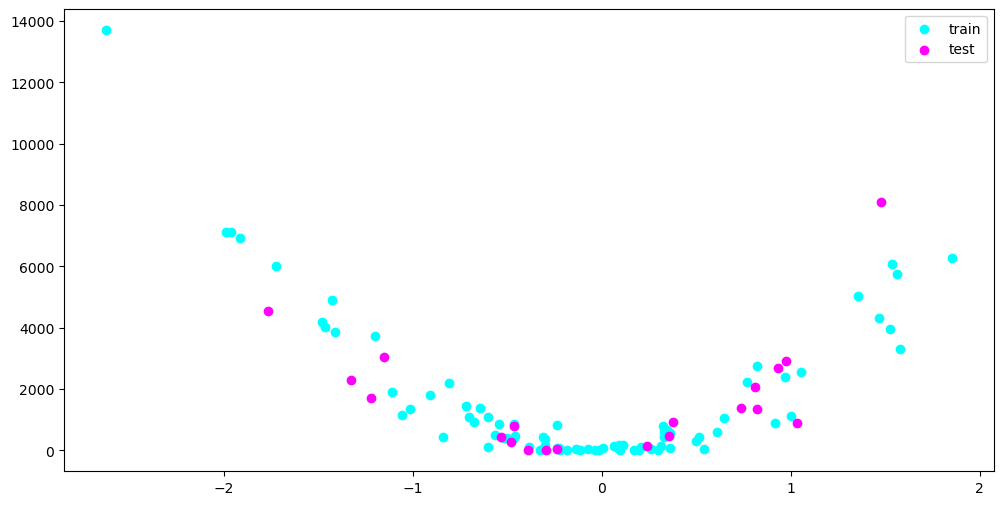

In [126]:
fig, ax = plt.subplots(figsize=(12, 6))

ax.scatter(x_train,y_train, color='cyan', label='train')
ax.scatter(x_test,y_test, color='magenta', label='test')
ax.legend();

# Create linear regression object
# predict data on your test set.

In [127]:
model = LinearRegression() #create a model
model.fit(x_train, y_train) # learn
print(model.score(x_train, y_train))
print(model.score(x_test, y_test))

0.0705766848619741
-0.21928268161487185


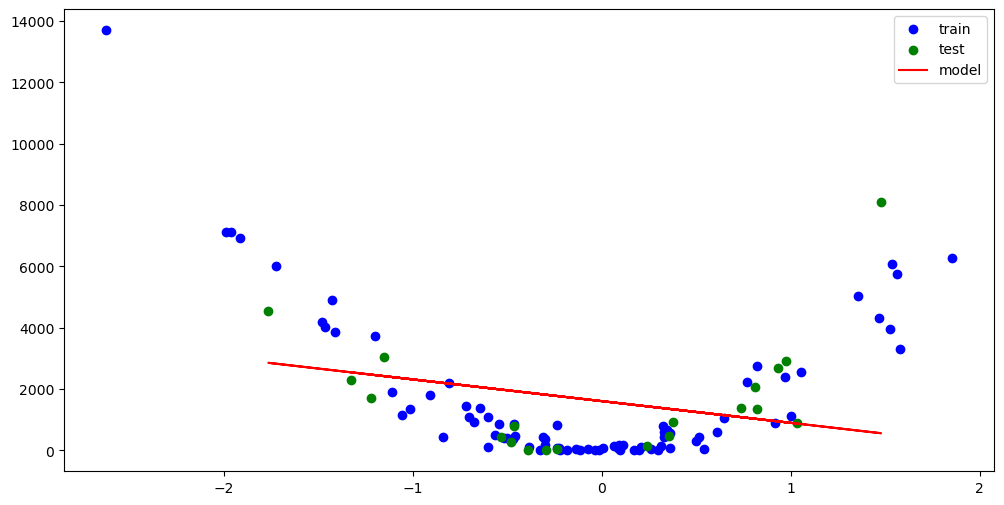

In [128]:
y_pred = model.predict(x_test)

fig, ax = plt.subplots(figsize=(12, 6))

ax.scatter(x_train,y_train, color='b', label='train')
ax.scatter(x_test,y_test, color='g', label='test')
ax.plot(x_test,y_pred, color='red', label='model')

ax.legend()

In [129]:
RMSE = mean_squared_error(y_test, y_pred, squared=False)
RMSE

2095.722575408449

In [130]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
#1: Determining the degree of the polynomial

x_train_2 = PolynomialFeatures(degree=2, include_bias=False).fit_transform(x_train)
x_test_2 = PolynomialFeatures(degree=2, include_bias=False).fit_transform(x_test)

model = LinearRegression() # create a model
model.fit(x_train_2, y_train) # learn


LinearRegression()

#2: Creating the new features

(80, 2) (80,)


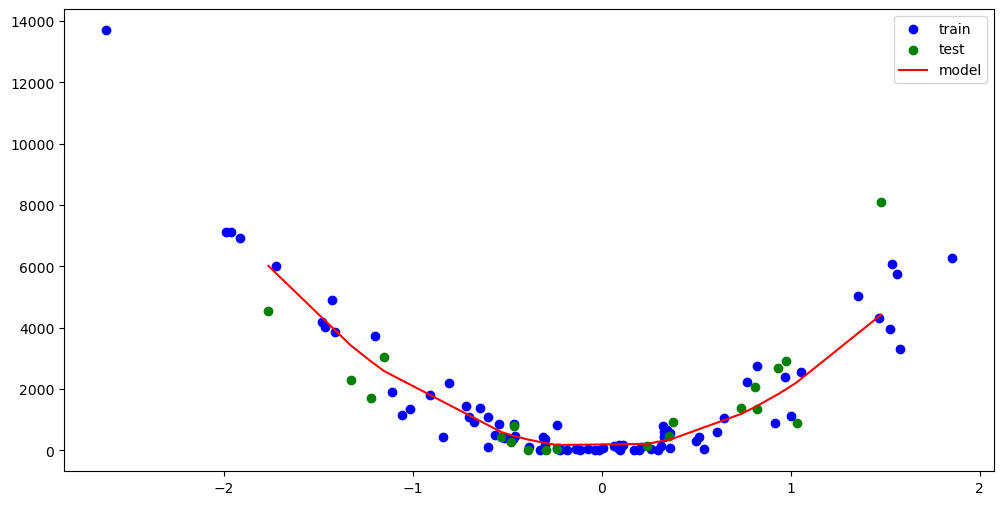

In [137]:
y_pred = model.predict(x_test_2)

fig, ax = plt.subplots(figsize=(12, 6))
print(x_train_2.shape,y_train.shape)
ax.scatter(x_train, y_train, color='b', label='train')
ax.scatter(x_test,y_test, color='g', label='test')

# EXPLAIN WHY WE DO THAT ?
# --
sorted_indices = np.argsort(x_test.T[0])
ax.plot(x_test[sorted_indices],y_pred[sorted_indices], color='red', label='model')

ax.legend()